S M Ali Zaidi, Cohort 4 Violet

Loading the Pretrained Model to Test and Deploy

In [1]:
from itertools import chain

import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords', quiet=True)
# nltk.download('punkt', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from sklearn import feature_extraction
from sklearn.metrics import confusion_matrix
from sklearn import model_selection as ms
from sklearn import naive_bayes
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import string

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.6 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset

# Choose a configuration: sentences_50agree, sentences_66agree, sentences_75agree, or sentences_allagree
config_name = 'sentences_50agree'  # As an example

dataset = load_dataset("financial_phrasebank", config_name)

# Now you can work with the dataset
print(dataset)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/4846 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4846
    })
})


In [4]:
from datasets import load_dataset

# Load the dataset with a specific configuration
dataset = load_dataset("financial_phrasebank", "sentences_allagree")

# Access a specific split of the dataset
data_split = dataset["train"]

# View the first 5 entries
for i in range(5):
    print(data_split[i])


Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

{'sentence': 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', 'label': 1}
{'sentence': "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .", 'label': 2}
{'sentence': 'In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .', 'label': 2}
{'sentence': 'Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .', 'label': 2}
{'sentence': 'Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales .', 'label': 2}


In [5]:
#printing 1st and 2nd row of the data set
dataset['train']['sentence'][0]
#dataset['train']['sentence'][1]

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [6]:
data_split

Dataset({
    features: ['sentence', 'label'],
    num_rows: 2264
})

In [7]:
#prinitnig 1st 10 rows of the dataset
for i in range(10):
  print(dataset['train']['sentence'][i]," label:" ,dataset['train']['label'][i])

According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  label: 1
For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .  label: 2
In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .  label: 2
Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .  label: 2
Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales .  label: 2
Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn .  label: 2
Clothing retail chain Sepp+ñl+ñ 's sales increased by 8 % to EUR 155.2 mn , and operating profit rose

Converting the Dataset in Pandas dataframe


In [8]:
import pandas as pd

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset['train'])


In [ ]:
df.head(15)

,sentence,label
0,"According to Gran , the company has no plans t...",1
1,"For the last quarter of 2010 , Componenta 's n...",2
2,"In the third quarter of 2010 , net sales incre...",2
3,Operating profit rose to EUR 13.1 mn from EUR ...,2
4,"Operating profit totalled EUR 21.1 mn , up fro...",2
5,Finnish Talentum reports its operating profit ...,2
6,Clothing retail chain Sepp+ñl+ñ 's sales incre...,2
7,Consolidated net sales increased 16 % to reach...,2
8,Foundries division reports its sales increased...,2
9,"HELSINKI ( AFX ) - Shares closed higher , led ...",2


In [9]:
df.tail(15)

,sentence,label
2249,Mobile communication and wireless broadband pr...,1
2250,External net sales from the printing business ...,0
2251,"Seven-month sales of Ragutis , which is contro...",0
2252,"The OMX Helsinki index was down 0.34 pct at 8,...",0
2253,Repeats sees 2008 operating profit down y-y ( ...,0
2254,Comparable operating profit totaled EUR 4.7 mn...,0
2255,In Finland 's Hobby Hall 's sales decreased by...,0
2256,In the Baltic states the company reports net s...,0
2257,"Operating profits in the half were 0.8 m , do...",0
2258,"Sales in Finland decreased by 2.0 % , and inte...",0


Unique categories:

In [10]:
categories = list(df['label'].unique())
categories

[1, 2, 0]

o Negative
1 Neutral
2 Positive

In [11]:
df.shape

(2264, 2)

Unique Sentences

In [12]:
cleaned_sentences = list(df['sentence'].unique())
len(cleaned_sentences)

2259

2259 unique sentences

In [13]:
df['label'].value_counts()

1    1391
2     570
0     303
Name: label, dtype: int64

Number of unique rows by category

In [14]:
cat_unique_val = {}

for category in categories:
    mask = df['label'] == category
    list_length = len(list(df[mask]['sentence'].unique()))
    cat_unique_val.update({category: list_length})

    cat_unique_val

In [15]:
cat_unique_val

{1: 1386, 2: 570, 0: 303}

Dropping duplicate rows from each category

In [16]:
text_df = df.drop_duplicates()

In [17]:
text_df.shape

(2259, 2)

Text Cleaning

Removing stopwords and punctuation from "sentence" column

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
regular_punct = list(string.punctuation)

In [20]:
text_df['sentence']

0       According to Gran , the company has no plans t...
1       For the last quarter of 2010 , Componenta 's n...
2       In the third quarter of 2010 , net sales incre...
3       Operating profit rose to EUR 13.1 mn from EUR ...
4       Operating profit totalled EUR 21.1 mn , up fro...
                              ...                        
2259    Operating result for the 12-month period decre...
2260    HELSINKI Thomson Financial - Shares in Cargote...
2261    LONDON MarketWatch -- Share prices ended lower...
2262    Operating profit fell to EUR 35.4 mn from EUR ...
2263    Sales in Finland decreased by 10.5 % in Januar...
Name: sentence, Length: 2259, dtype: object

In [21]:
def text_preprocessing(x):
    filtered_sentence = []
    word_tokens = word_tokenize(x)

    for w in word_tokens:
        if w not in chain(stop_words, regular_punct):
            # we make sure that all words are written in lowercase
            filtered_sentence.append(w.lower())

    # Converting a list of strings back to a string
    filtered_sentence = " ".join(filtered_sentence)
    return filtered_sentence

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
text_df['sentence'] = text_df['sentence'].apply(text_preprocessing)

<ipython-input-23-32d659831244>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['sentence'] = text_df['sentence'].apply(text_preprocessing)


In [24]:
text_df['sentence']

0       according gran company plans move production r...
1       for last quarter 2010 componenta 's net sales ...
2       in third quarter 2010 net sales increased 5.2 ...
3       operating profit rose eur 13.1 mn eur 8.7 mn c...
4       operating profit totalled eur 21.1 mn eur 18.6...
                              ...                        
2259    operating result 12-month period decreased pro...
2260    helsinki thomson financial shares cargotec fel...
2261    london marketwatch -- share prices ended lower...
2262    operating profit fell eur 35.4 mn eur 68.8 mn ...
2263    sales finland decreased 10.5 january sales out...
Name: sentence, Length: 2259, dtype: object

Preprocessing the data

In [25]:
counts = feature_extraction.text.CountVectorizer()
X = counts.fit_transform(text_df['sentence'].values)
X.shape

(2259, 6013)

In [26]:
y = text_df['label'].values

Defining the test set by defining trainig test and validation sets once again.

In [27]:
# Spliting the data into training and a temp test set (80% train, 20% temp test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Spliting the temp test set into actual test and validation sets (50% test, 50% validation from the temp test)
# This results in 80% train, 10% validation, and 10% test set, assuming the initial split was 80-20.
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Loading Pretrained Model

In [28]:
pickled_model = pickle.load(open('/content/model_save_fin.pkl', 'rb'))

In [29]:
pickled_model.score(X_train, y_train)

0.9241837299391257

In [30]:
pickled_model.score(X_test, y_test)

0.8230088495575221

In [31]:
y_pred = pickled_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 11,   2,  13],
       [  8, 116,   7],
       [  5,   5,  59]])

In [32]:
X_test[0]

<1x6013 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [33]:
# cat_unique_val is a list of integers or numpy.int64 values
target_names = [str(label) for label in cat_unique_val]

In [34]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.46      0.42      0.44        26
           2       0.94      0.89      0.91       131
           0       0.75      0.86      0.80        69

    accuracy                           0.82       226
   macro avg       0.72      0.72      0.72       226
weighted avg       0.83      0.82      0.82       226



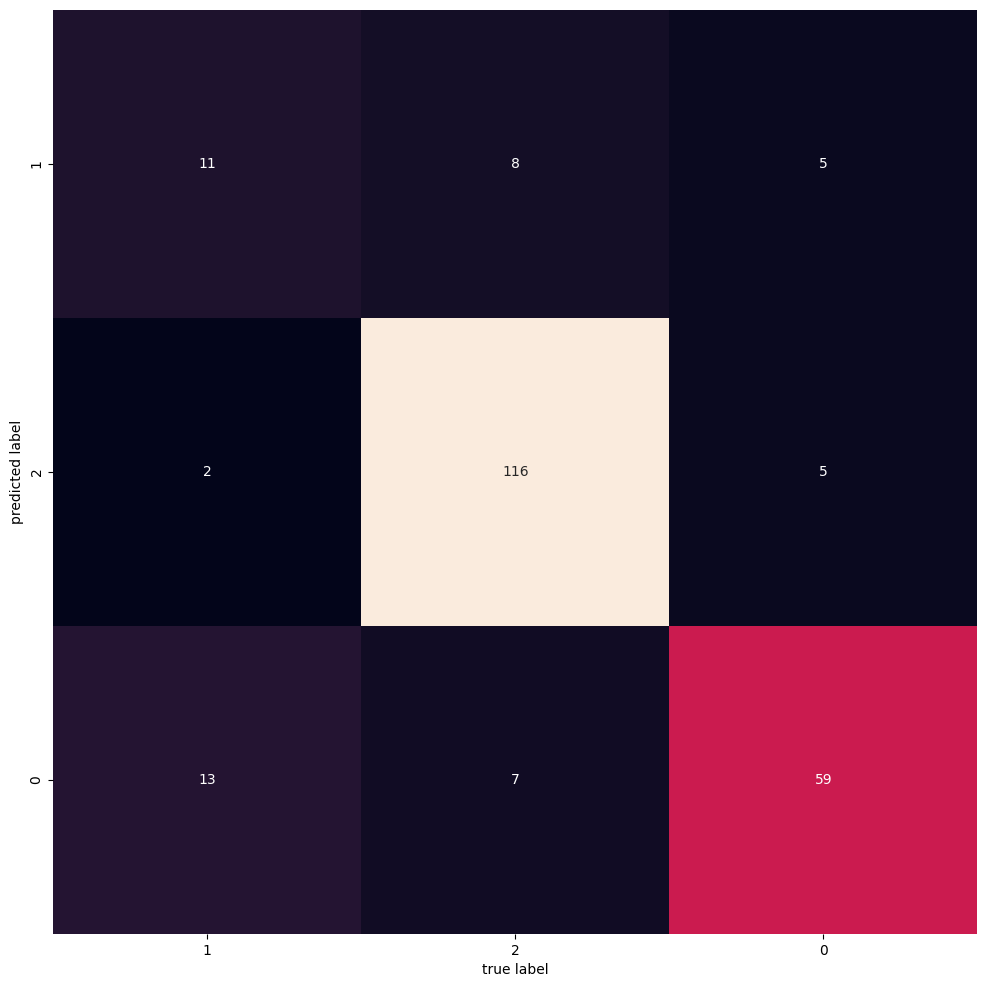

In [35]:
mat = confusion_matrix(y_test, pickled_model.predict(X_test))
plt.figure(figsize=(18,12))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=cat_unique_val,
            yticklabels=cat_unique_val
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

Deploying the Model on GRADIO

In [37]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.3 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl siz

In [41]:
import gradio as gr

Deploying the Model Using Pipleline by Transformers

In [39]:
from transformers import pipeline

# Load sentiment analysis model
sentiment_classifier = pipeline("sentiment-analysis")

def classify_sentiment(input_text):
    result = sentiment_classifier(input_text)
    return result[0]['label']

iface = gr.Interface(fn=classify_sentiment, inputs="text", outputs="text", title="Sentiment Analysis")
iface.launch()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bce119db2a1b0368fc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
